In [10]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [12]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [13]:
coverage_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,1.0,1.000000,1.000000,1.000000,0.714286,0.714286
1,1.0,0.833333,1.000000,1.000000,0.833333,0.500000
2,0.5,1.000000,1.000000,1.000000,1.000000,0.666667
3,1.0,0.666667,0.666667,1.000000,1.000000,0.666667
4,1.0,1.000000,1.000000,1.000000,0.833333,0.500000
...,...,...,...,...,...,...
45,1.0,0.833333,0.833333,0.666667,1.000000,0.714286
46,1.0,1.000000,0.833333,0.500000,0.500000,0.666667
47,1.0,1.000000,0.833333,1.000000,1.000000,0.500000
48,1.0,0.833333,1.000000,0.833333,0.833333,0.666667


In [14]:
length_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,2.101828,1.498957,1.259517,1.177591,25.308622,1.258967
1,2.080014,1.394050,1.555499,3.332368,2.290091,1.166525
2,1.588627,22.984794,1.991801,1.407086,1.871536,1.178633
3,1.940358,1.274430,1.171616,1.215568,8.596456,1.175594
4,2.099173,1.447830,2.214922,1.226444,4.511139,1.148400
...,...,...,...,...,...,...
45,1.906959,18.934057,1.928816,1.222718,10.678812,1.282862
46,2.226842,4.162180,1.585557,1.405087,176.404555,1.164780
47,2.114453,1.253282,1.286865,1.194254,3.009613,1.173632
48,1.839150,1.340730,1.315674,1.190927,2.748298,1.155154


In [15]:
MSE_df

,1.0,2.5,5.0,10.0,Tree val,Naive
0,4.754626,5.385438,6.062667,5.715567,4.774639,4.774639
1,5.007723,4.517161,5.284633,5.598432,4.747049,4.747049
2,5.004523,4.477550,4.936360,5.975434,4.853868,4.853868
3,6.023852,5.498041,6.179695,6.447653,5.547141,5.547141
4,3.863381,4.093041,4.473121,4.453665,4.162055,4.162055
...,...,...,...,...,...,...
45,4.504989,4.552447,4.692785,5.201841,4.976313,4.976313
46,4.621166,4.948239,6.182258,5.300265,5.266812,5.266812
47,4.717608,4.603610,5.317180,5.558006,4.680895,4.680895
48,3.957127,4.572552,3.898007,5.014722,3.773166,3.773166


In [29]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            if len_baseline_key:
                axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(0,MSE_lim)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 RRT(1)         0.902762
RRT(2.5)       0.873238
RRT(5)         0.888562
RRT(10)        0.898862
Tree-values    0.900524
Naive          0.666210
dtype: float64
Length :
 RRT(1)          2.463932
RRT(2.5)        2.529877
RRT(5)          2.596110
RRT(10)         2.654258
Tree-values    13.234837
Naive           1.177034
dtype: float64
MSE :
 RRT(1)         4.713445
RRT(2.5)       4.911319
RRT(5)         5.141066
RRT(10)        5.403320
Tree-values    4.703286
Naive          4.703286
dtype: float64


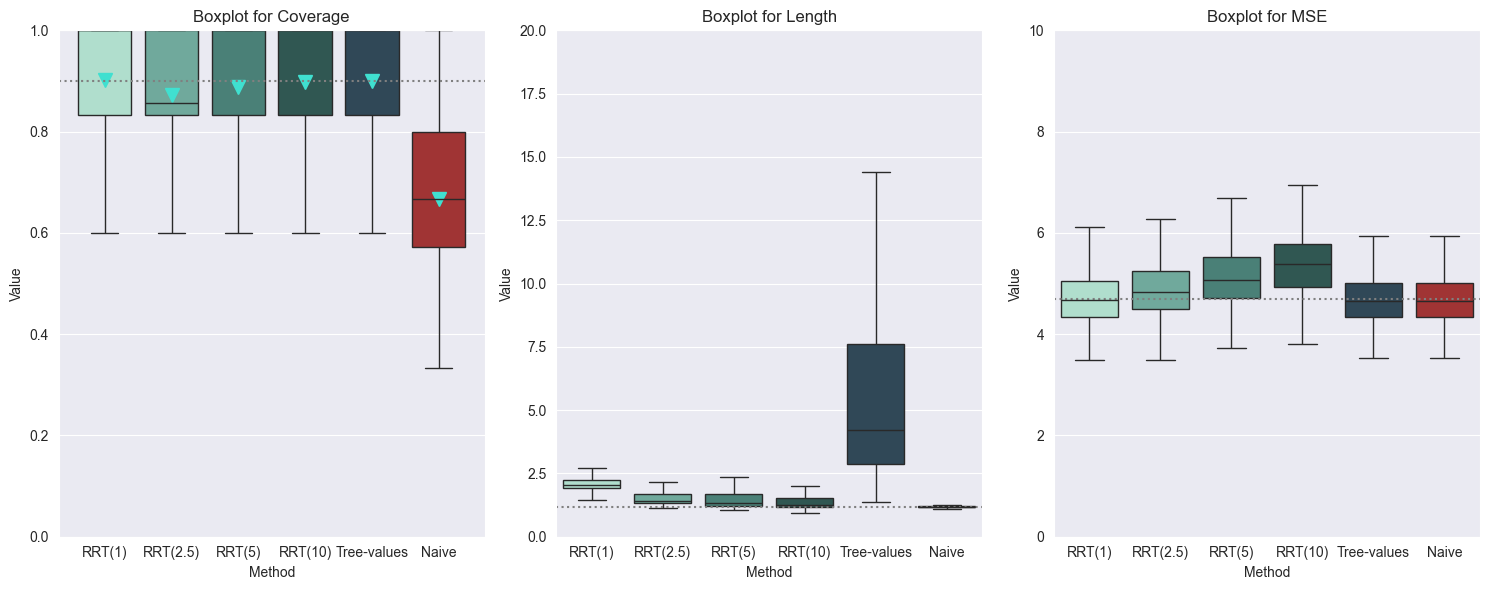

In [30]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=20,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values", "Naive"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#B22222"])

In [9]:
# TODO: Case 1 with 1, 5, 10